Import packages

In [4]:
import env_methods as em
import vis_methods as vis
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
import math
import time

Basic parameters

In [23]:
#Define bounding box in North America
lat_start = 0
lat_end = 90
lon_start = -179
lon_end =  -30

#Data paths
main_path = r'C:\Users\bpara\Geo data'

temps_path = r'\temp'
mean_path = r'\geopotential mean'
wind_path = r'\wind'

#Time stuff
month_to_show = 4 #What number of month to show, 0 = Dec 1843, 1 = Jan 1844, 2 = Feb 1844...
months = ["December", "January", "February", "March", "April", "May", "June"]

Import data

In [6]:
temp_data = em.get_data(main_path+temps_path, False, [12, 1843, 12, 1844])
mean_data = em.get_data(main_path+mean_path, False, [12, 1843, 12, 1844])
wind_data = em.get_data(main_path+wind_path, False, [12, 1843, 12, 1844])

acquring data from air.2m.mon.mean.nc
acquring data from hgt.mon.mean.nc
acquring data from uwnd.mon.mean.nc
acquring data from vwnd.mon.mean.nc


Draw the mapping

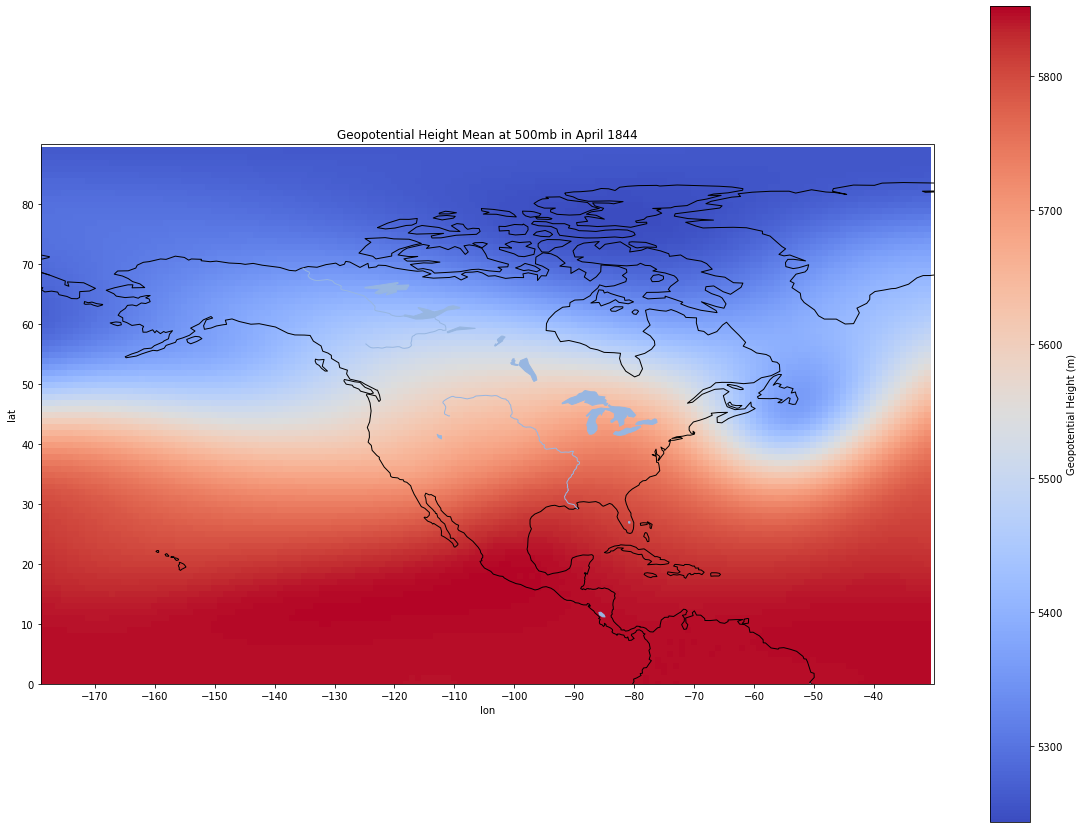

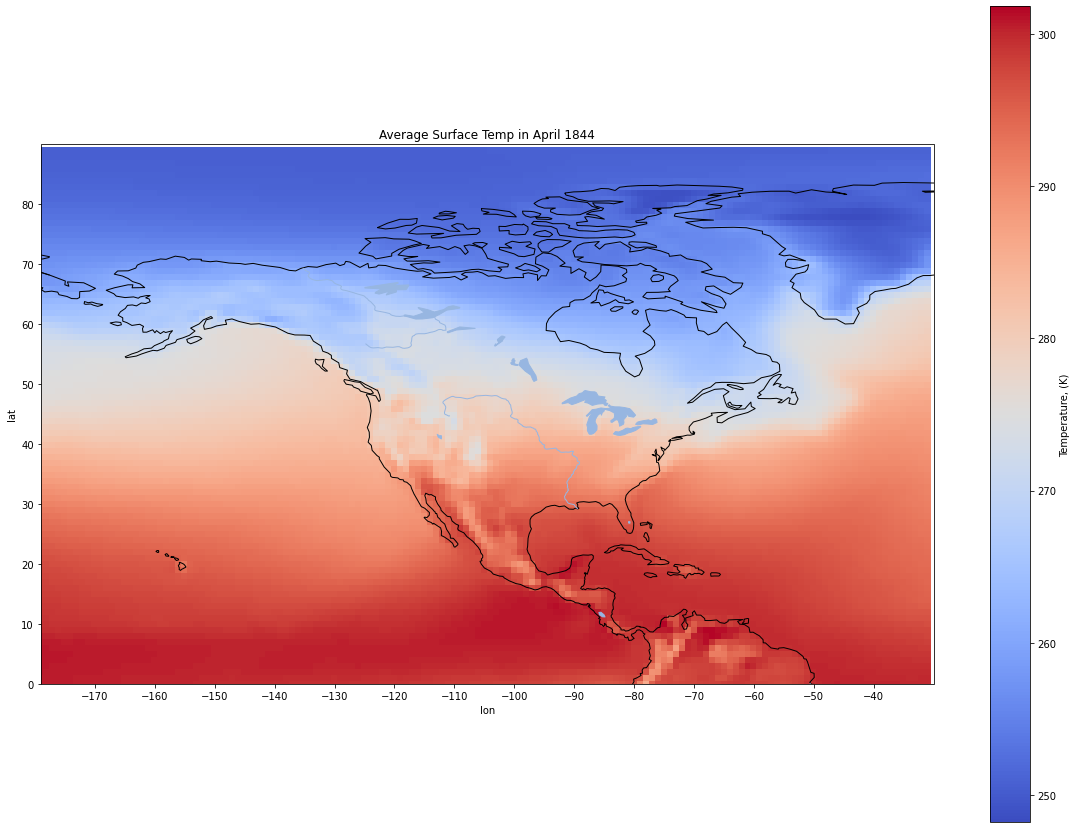

In [6]:
vis.plot_data(mean_data["lon"], mean_data["lat"], mean_data["nc_vars"]["hgt"][month_to_show][2], 
          "Geopotential Height (m)", "Geopotential Height Mean at 500mb in April 1844", lon_start, lon_end, lat_start, lat_end)
vis.plot_data(temp_data["lon"], temp_data["lat"], temp_data["nc_vars"]["air"][month_to_show], "Temperature, (K)", 
          "Average Surface Temp in April 1844", lon_start, lon_end, lat_start, lat_end)

And now for vector wind

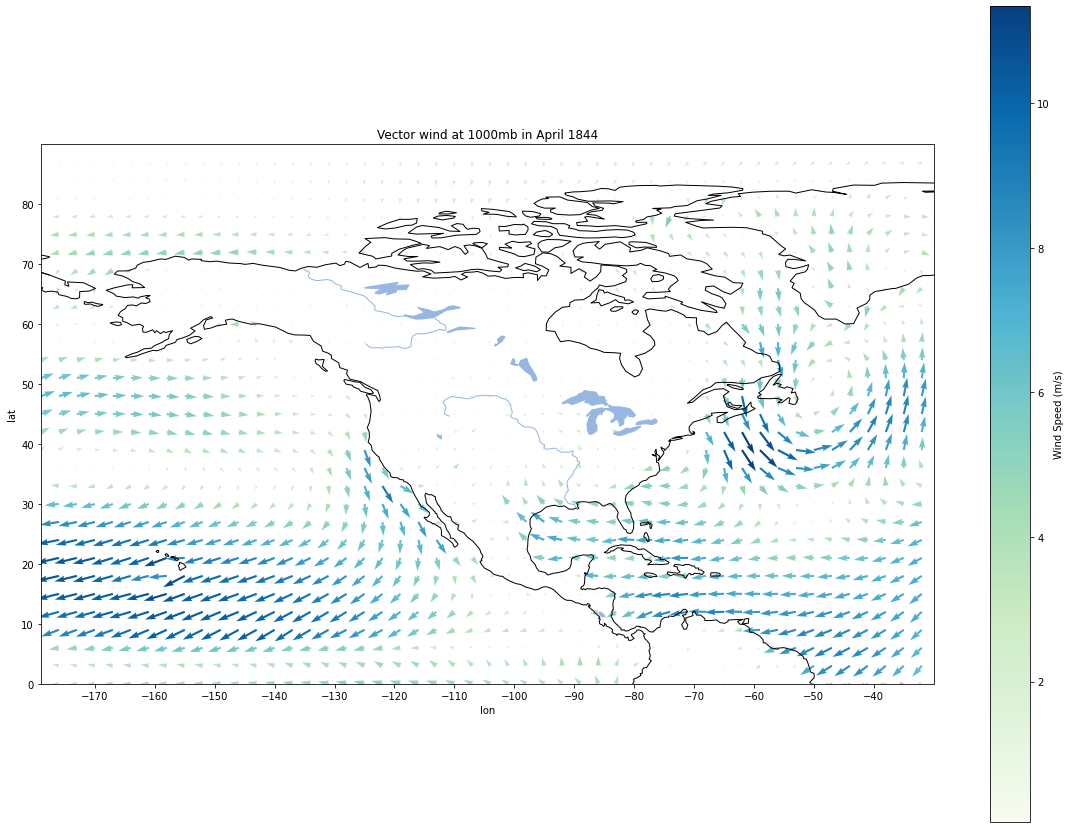

In [45]:
vis.plot_vector_data(wind_data["lon"], wind_data["lat"], wind_data["nc_vars"]["uwnd"][month_to_show][0], 
                 wind_data["nc_vars"]["vwnd"][month_to_show][0], "Vector wind at 1000mb in April 1844", "Wind Speed (m/s)",
                 lon_start, lon_end, lat_start, lat_end)

Plain vector wind can get a little messy with really long arrows, this one normalizes the length of all the arrows and only uses the color for magnitude

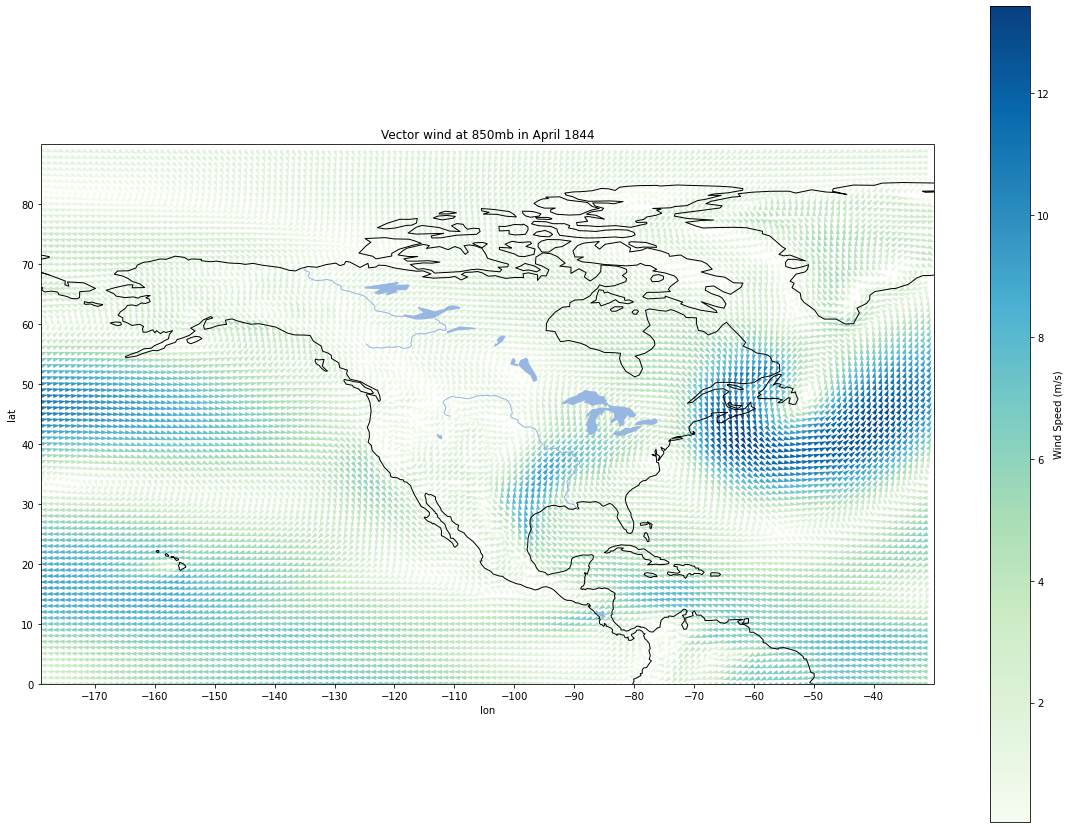

In [14]:
vis.plot_nvector_data(wind_data["lon"], wind_data["lat"], wind_data["nc_vars"]["uwnd"][month_to_show][1], 
                 wind_data["nc_vars"]["vwnd"][month_to_show][1], "Vector wind at 850mb in April 1844", "Wind Speed (m/s)",
                 lon_start, lon_end, lat_start, lat_end)

In [ ]:
wind_data

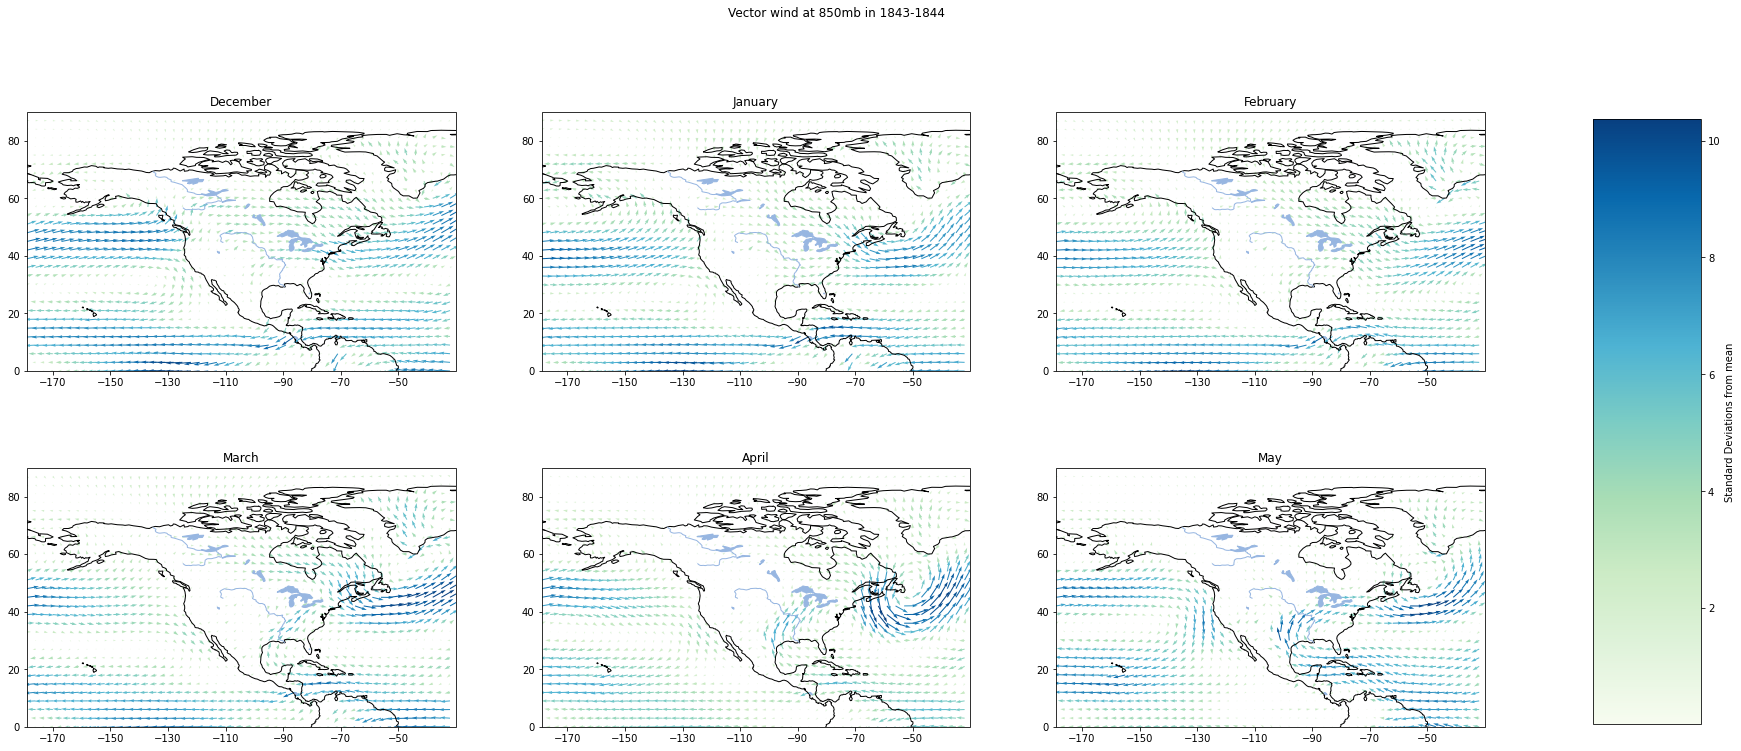

In [46]:
#this is a terrible function I wrote late at night for 1 specific purpose. Please never use it

def generate_six_month_plot_vector(fname, scalebar, title, data, datakey, start_year, end_year, focus_year, has_levels, level=0, 
                           lon_min = 0, lon_max = 359, lat_min = -90, lat_max = 90, 
                            has_scale_bounds = False, scale_min = -3, scale_max = 3):
    
    lat1 = em.find_closest_val(lat_min, data["lat"])
    lat2 = em.find_closest_val(lat_max, data["lat"])
    
    mesh = None
    
    fig, axs = plt.subplots(2,3, figsize=(30, 12), subplot_kw={'projection':ccrs.PlateCarree(central_longitude = 0)})
    for x in range(len(axs)):
        for y in range(len(axs[x])):
            axs[x][y].coastlines()
            axs[x][y].add_feature(cartopy.feature.LAKES, alpha=1)
            axs[x][y].add_feature(cartopy.feature.RIVERS, alpha = 1)
            axs[x][y].set_extent((lon_min, lon_max, lat_min, lat_max))
            axs[x][y].set_xticks(data["lon"][math.ceil(lon_min / 10) * 10:lon_max][::20], crs = ccrs.PlateCarree())
            axs[x][y].set_yticks(data["lat"][math.ceil(lat1 / 10) * 10:lat2][::20], crs = ccrs.PlateCarree())
            axs[x][y].set_title(months[3*x+y])
            time_data = None
            if x + y == 0:
                time_data = [12, focus_year-1]
            else:
                time_data = [3*x+y, focus_year]
             
            
            cguide = np.hypot(data["nc_vars"]["uwnd"][3*x+y, level, lat1:lat2, lon_min:lon_max][::3,::3], 
                     data["nc_vars"]["vwnd"][3*x+y, level, lat1:lat2, lon_min:lon_max][::3,::3])
            
            mesh = axs[x][y].quiver(data["lon"][lon_min:lon_max][::3], 
                              data["lat"][lat1:lat2][::3], 
                              data["nc_vars"]["uwnd"][3*x+y, level, lat1:lat2, lon_min:lon_max][::3,::3], 
                                    data["nc_vars"]["vwnd"][3*x+y, level, lat1:lat2, lon_min:lon_max][::3,::3], cguide,
                                    cmap="GnBu", scale = 300)
            
            
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    bar = fig.colorbar(mesh, cax=cbar_ax)
    bar.set_label(scalebar)
    
    fig.suptitle(title)
    
    plt.savefig(fname)
            
generate_six_month_plot_vector("wind 850mb.png", "Standard Deviations from mean", "Vector wind at 850mb in 1843-1844",
                        wind_data, "soilm", 1836, 1980, 1844, has_levels=False, level = 1, lon_min = lon_start, lon_max = lon_end, 
                        lat_min = lat_start, lat_max = lat_end, has_scale_bounds = True, scale_min = 3, scale_max = 3)

In [11]:
wind_data

{'level': [1000, 850, 500],
 'lat': [-90.0,
  -89.0,
  -88.0,
  -87.0,
  -86.0,
  -85.0,
  -84.0,
  -83.0,
  -82.0,
  -81.0,
  -80.0,
  -79.0,
  -78.0,
  -77.0,
  -76.0,
  -75.0,
  -74.0,
  -73.0,
  -72.0,
  -71.0,
  -70.0,
  -69.0,
  -68.0,
  -67.0,
  -66.0,
  -65.0,
  -64.0,
  -63.0,
  -62.0,
  -61.0,
  -60.0,
  -59.0,
  -58.0,
  -57.0,
  -56.0,
  -55.0,
  -54.0,
  -53.0,
  -52.0,
  -51.0,
  -50.0,
  -49.0,
  -48.0,
  -47.0,
  -46.0,
  -45.0,
  -44.0,
  -43.0,
  -42.0,
  -41.0,
  -40.0,
  -39.0,
  -38.0,
  -37.0,
  -36.0,
  -35.0,
  -34.0,
  -33.0,
  -32.0,
  -31.0,
  -30.0,
  -29.0,
  -28.0,
  -27.0,
  -26.0,
  -25.0,
  -24.0,
  -23.0,
  -22.0,
  -21.0,
  -20.0,
  -19.0,
  -18.0,
  -17.0,
  -16.0,
  -15.0,
  -14.0,
  -13.0,
  -12.0,
  -11.0,
  -10.0,
  -9.0,
  -8.0,
  -7.0,
  -6.0,
  -5.0,
  -4.0,
  -3.0,
  -2.0,
  -1.0,
  0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0